<a href="https://colab.research.google.com/github/LandryArgabright/undergrad_projects/blob/master/Ironman_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ironman 140.3
##Analysis of Ironman finishing times, locations and years

## Preprocessing

### Importing & Cleaning ###

In [0]:
import pandas as pd
import numpy as np

from datetime import timedelta
import datetime as dt

import math
import os
import glob

import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import glob

file_path = glob.glob("/content/drive/My Drive/Race_Results_IM/*.csv")

df = pd.concat( [pd.read_csv(s) for s in file_path], ignore_index=True )

In [0]:
for f in file_path:
  location = f.split('_')

In [0]:
df.columns

Index(['name', 'genderRank', 'divRank', 'overallRank', 'bib', 'division',
       'age', 'state', 'country', 'profession', 'points', 'swim',
       'swimDistance', 't1', 'bike', 'bikeDistance', 't2', 'run',
       'runDistance', 'overall'],
      dtype='object')

In [0]:

og_df = df

# cleaning data 
# dropping columsn and rows with no information

df = df.drop(columns=[
                      'points',
                      'genderRank',
                      'overallRank'])
df = df[(df.overall != 'DNF') &
        (df.overall != 'DNS') & 
        (df.overall != 'DQ')]
df = df.replace('---', np.nan)

In [0]:
df.head()
df.shape

(360817, 17)

In [0]:
print( df.shape )
print( og_df.shape )

(360817, 17)
(436131, 20)


In [0]:
# Percent lost of data
val = (360817 / 436131)
lost = (1 - val) * 100
print( str( round(lost, 4)) + '%' + ' decrease in data.')

17.2687% decrease in data.


In [0]:
# little eda
def prin(*args):
  for col in args:
    print( df[col].value_counts(dropna=True).head())


print('profession','swim','bike','run','overall')

profession swim bike run overall


### Converting datatypes and visualizing data ###

In [0]:
# replacing timedelta format with float
def float_timedelt( arg ):
    return pd.to_timedelta(df[arg].values).total_seconds() / 3600


df['swim'] = float_timedelt('swim')
df['bike'] = float_timedelt('bike')
df['run'] = float_timedelt('run')
df['overall'] = float_timedelt('overall')
df['t1'] = float_timedelt('t1')
df['t2'] = float_timedelt('t2')
  
#df['swim'] = pd.to_timedelta(df['swim'].values).total_seconds() / 3600
#df['bike'] = pd.to_timedelta(df['bike'].values).total_seconds() / 3600
#df['run'] = pd.to_timedelta(df['run'].values).total_seconds() / 3600
#df['overall'] = pd.to_timedelta(df['overall'].values).total_seconds() / 3600

In [0]:
# averaging times in x/100 fraction

def avg(args):
    return round((df[str(args)].sum()) / len(df), 4)

  
avg_swim_time = avg('swim')
avg_bike_time = avg('bike')
avg_run_time = avg('run')
avg_overall_time = avg('overall')

In [0]:
# convert fraction to hours:minutes format

def convert_time(time):
    total = time * 60
    hour = total // 60
    minutes = total % 60
    expression = str("%d:%02d" % (hour, minutes))
    return (expression)

avg_swim = convert_time(avg_swim_time)
avg_bike = convert_time(avg_bike_time)
avg_run = convert_time(avg_run_time)
avg_overall = convert_time(avg_overall_time)

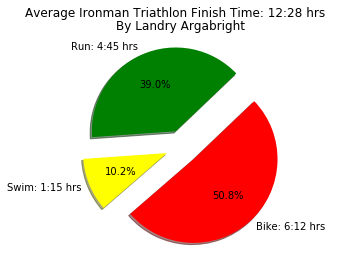

In [0]:
# Data to plot
labels = 'Swim: {} hrs'.format(avg_swim), 'Bike: {} hrs'.format(avg_bike), 'Run: {} hrs'.format(avg_run)
sizes = [avg_swim_time, avg_bike_time, avg_run_time]
colors = ['yellow', 'red', 'green']
explode = (.2, .2, .2)

# Plot
plt.pie(sizes, explode=explode,
        labels=labels, 
        colors=colors,
autopct='%1.1f%%', 
        shadow=True, 
        startangle=184)
plt.title('By Landry Argabright')
plt.suptitle('Average Ironman Triathlon Finish Time: {} hrs'.format(avg_overall))
plt.axis('equal')
plt.show()

In [0]:
# pivot the table to division index
df_pivot = pd.pivot_table(df, index='division')

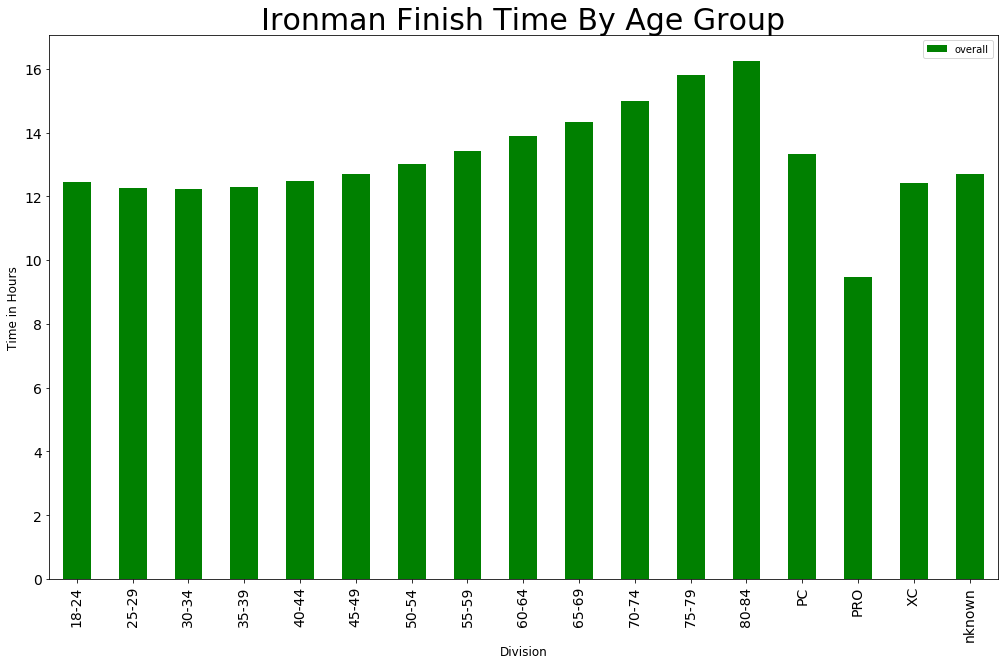

In [0]:
# plotting barplot

ax = df_pivot[['overall']].plot(kind='bar', 
                                figsize=(17,10), 
                                legend=True, 
                                fontsize=14,
                               color='green')

#setting labels

ax.set_xlabel('Division', 
              fontsize=12)
ax.set_ylabel('Time in Hours', 
              fontsize=12)

ax.set_title('Ironman Finish Time By Age Group', 
             fontsize=30)

# need to label y values of each bar

plt.show()

### Importing csv files to dataframes based on location### 

In [0]:

def by_location(location, files):
    #creates list of filenames based on keyword 'location'
    location = str(location)
    return [sr for sr in files if location in sr]


def globbing(name):
    #globbing filenames from list of locations from csv file names
    return glob.glob(name + "*.csv")

In [0]:
names = []
dct = {}

# for loop for the unqiue im locations
for sr in file_path:
    if sr.split('2')[0] not in names:
        names.append( sr.split('2')[0] )
                

  
australia = globbing(names[0])
df_australia = pd.concat( [pd.read_csv(str(sr)) for sr in australia],
               ignore_index=True )

austria = globbing(names[1])
df_austria = pd.concat( [pd.read_csv(str(sr)) for sr in austria],
                       ignore_index=True)

coeur_dalene = globbing(names[6])
df_coeur_dalene = pd.concat( [pd.read_csv(str(sr)) for sr in coeur_dalene],
                            ignore_index=True)
print( df_coeur_dalene.shape )
print( df_austria.shape )
print( df_australia.shape )

(5023, 20)
(31754, 20)
(18089, 20)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute, preprocessing
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [0]:
# CLEAN DATA FUNCTION

def clean(df, name):
    df = df.drop( 
        columns = ['name',
            'genderRank',
            'divRank',
            'overallRank',
            'bib',
            'division',
            'age',
            'state',
            'country',
            'profession',
            'points',
            'swimDistance',
            'bikeDistance',
            'runDistance'
          ])

    df = df[(df.overall != 'DNF') &
            (df.overall != 'DNS') &
            (df.overall != 'DQ')]
    
    
    
     # creating column to identify location of event
    df['location'] = [ name for i in range(len(df))]
    
    return df

In [0]:

#CLEAN DATA WITH NEW COLUMN

df_australia = clean(df_australia, 'Australia')
df_austria = clean(df_austria, 'Austria')
df_coeur_dalene = clean(df_coeur_dalene, 'Coeur_dAlene')

df_names = [df_australia,df_austria]

In [0]:
print( df_australia.shape , df_austria.shape)


(16216, 7) (26227, 7)


### Creating dataframes ###

In [0]:
#PROCESSING FOR FEATURE SELECTION

#creating one dataframe
dfs = pd.concat( [name for name in df_names] )

#adding dummie columns
dfs = pd.concat([dfs.drop('location', axis = 1) , pd.get_dummies( dfs['location'])], axis=1)
 

In [0]:
 #DROPPING ROWS ALLTOGETHER for classification problem
dfs = dfs.replace('---', np.nan)
    
dfs = dfs.dropna()
    
dfs.reset_index(drop=True)
print( " " )

In [0]:
# replacing timedelta format with float
def float_timedelt( arg):
    return np.round( pd.to_timedelta(dfs[arg].values).total_seconds()
                 / 3600, 2 )


dfs['swim'] = float_timedelt('swim')
dfs['bike'] = float_timedelt('bike')
dfs['run'] = float_timedelt('run')
dfs['overall'] = float_timedelt('overall')
dfs['t1'] = float_timedelt('t1')
dfs['t2'] = float_timedelt('t2')

# averaging times in x/100 fraction

def avg(df, args):
    return round((df[str(args)].sum()) / len(df), 4)





# convert fraction to hours:minutes format

def convert_time(time):
    total = time * 60
    hour = total // 60
    minutes = total % 60
    expression = str("%d:%02d" % (hour, minutes))
    return (expression)


In [0]:
dfs.dtypes

swim         float64
t1           float64
bike         float64
t2           float64
run          float64
overall      float64
Australia      int64
Austria        int64
dtype: object

In [0]:
#copy of original dataframe
df2 = dfs.copy()

### Upsampling Check? ###

In [0]:
print('Amount of observations from Australian course: '  + str( dfs[ dfs['Austria'] == 0 ].shape ))
print('Amount of observations from Austrian course: '  + str( dfs[ dfs['Austria'] == 1 ].shape ))

Amount of observations from Australian course: (10474, 8)
Amount of observations from Austrian course: (25824, 8)


In [0]:
#downsampling because the difference between observations is extreme


### Predictive ###
Classifing Project -

  CLASSIFY LOCATION Australia[1] or Austria[0]
  
  Swim, t1, bike, t2, run and overall observations

## Predictive modeling

### Train Test Split ###

In [0]:
# X and Y values input to train test split
y = dfs['Australia']
X = dfs.drop(columns=['Australia', 'Austria'])
# the more columns higher prediction and changed test_size to 0.3
# estimatation of 12% change in prediction

In [0]:
X.info()
print( y.tail() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36298 entries, 0 to 31296
Data columns (total 6 columns):
swim       36298 non-null float64
t1         36298 non-null float64
bike       36298 non-null float64
t2         36298 non-null float64
run        36298 non-null float64
overall    36298 non-null float64
dtypes: float64(6)
memory usage: 1.9 MB
31292    0
31293    0
31294    0
31295    0
31296    0
Name: Australia, dtype: int64


In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split( 
    X, y,
    test_size=0.3, random_state=123)

### KNN ###

In [0]:
#logistic regression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = { 'n_neighbors' : np.arange(1,50) }

#initialize KNN and knc_cv

knc = KNeighborsClassifier(n_neighbors=21)
knc_cv = GridSearchCV(knc, param_grid=param_grid)

In [0]:
#cross validation parameter tuning
knc_cv.fit(X_train, y_train)
print( knc_cv.best_params_)
print( knc_cv.best_score_)

{'n_neighbors': 19}
0.8116734886649875


In [0]:
# fit predict and score
knc.fit(X_train, y_train)
knc.predict(X_test)
knc.score(X_test, y_test)

0.8188246097337006

In [0]:
from yellowbrick.classifier import ConfusionMatrix

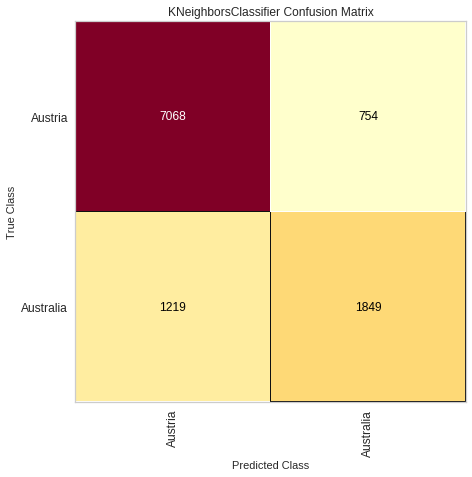

In [0]:
mapping = {0:'Austria', 1:"Australia"}
fig, ax = plt.subplots(figsize=(7,7))
cm_viz = ConfusionMatrix(knc, classes=['Austria', "Australia"],
                        label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof();

Explanation of Confusion Matrix

|             | **Predicted: No**| **Predicted: Yes** |
|-------------|---------------|----------------|
| **Actual: No** | True Negative | False Positive |
| **Actual: Yes** | False Negative | True Positive |

### Logistic Regression ###

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [0]:
lr = LogisticRegression(random_state=123, C=1000, penalty='l2')

In [0]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
print( lr.score(X_test, y_test) )
print( lr.coef_ )

0.843526170798898
[[  1.16709827  -9.90078043  10.94781676 -17.34092775   7.63708514
   -7.52737891]]


In [0]:
pd.DataFrame({"Variable":X_train.columns,
             "Coef.":lr.coef_[0]})

In [0]:
from yellowbrick.classifier import DiscriminationThreshold

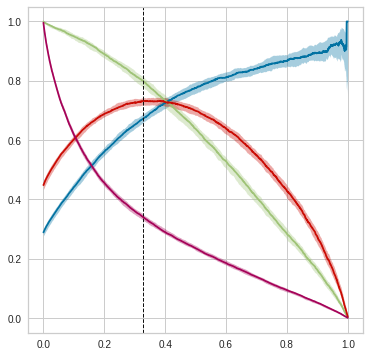

In [0]:
fig, ax = plt.subplots(figsize=(6,6))
dt_viz = DiscriminationThreshold(lr)
dt_viz.fit(X,y)
dt_viz.poof;

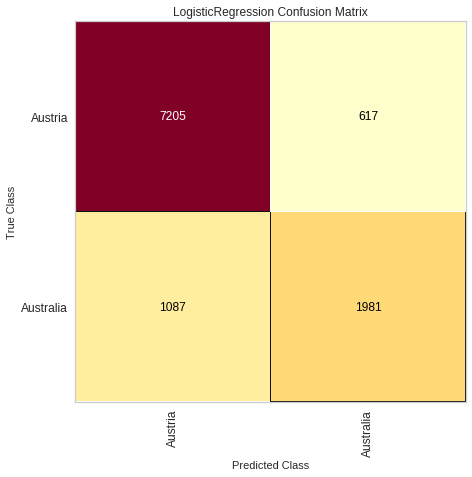

In [0]:
mapping = {0:'Austria', 1:"Australia"}
fig, ax = plt.subplots(figsize=(7,7))
cm_viz = ConfusionMatrix(lr, classes=['Austria', "Australia"],
                        label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof();

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {'penalty':['l1', 'l2'], 'C': [0.001, .01, .1, 1, 10, 100, 1000]}
lr_cv = GridSearchCV(lr, param_grid, cv=10)
lr_cv.fit(X_test, y_test)
print(lr_cv.best_params_)
print(lr_cv.best_score_)

{'C': 1000, 'penalty': 'l2'}
0.8418732782369146


### Naive Bayes ###

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.772910927456382

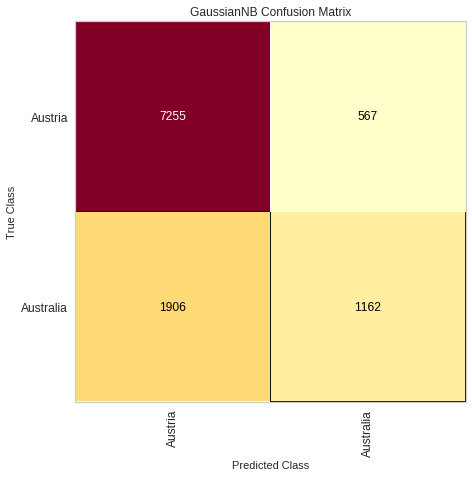

In [0]:
mapping = {0:'Austria', 1:"Australia"}
fig, ax = plt.subplots(figsize=(7,7))
cm_viz = ConfusionMatrix(nb, classes=['Austria', "Australia"],
                        label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof();

### Support Vector Machine ###

In [0]:
from sklearn.svm import SVC

In [0]:
svc = SVC(random_state=123 )

In [0]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [0]:
svc.score(X_test, y_test)

0.8416896235078053

In [0]:
from yellowbrick.classifier import ConfusionMatrix

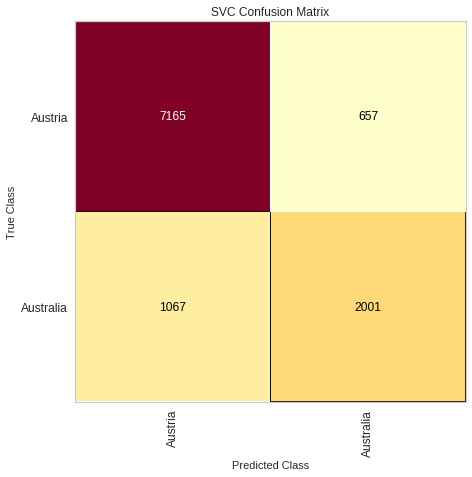

In [0]:
mapping = {0:'Austria', 1:"Australia"}
fig, ax = plt.subplots(figsize=(7,7))
cm_viz = ConfusionMatrix(svc, classes=['Austria', "Australia"],
                        label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof();

use surrogate trick to explain SVM model

### Decision Tree ###

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dt = DecisionTreeClassifier(random_state=123, max_depth=3)

In [0]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7859504132231405

In [0]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz

In [0]:
dot_data = StringIO()

In [0]:
export_graphviz(dt, out_file=dot_data,
               feature_names=X.columns,
               class_names=['Australia', 'Austria'],
               filled=True)

In [0]:
g = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [0]:
from IPython.display import Image

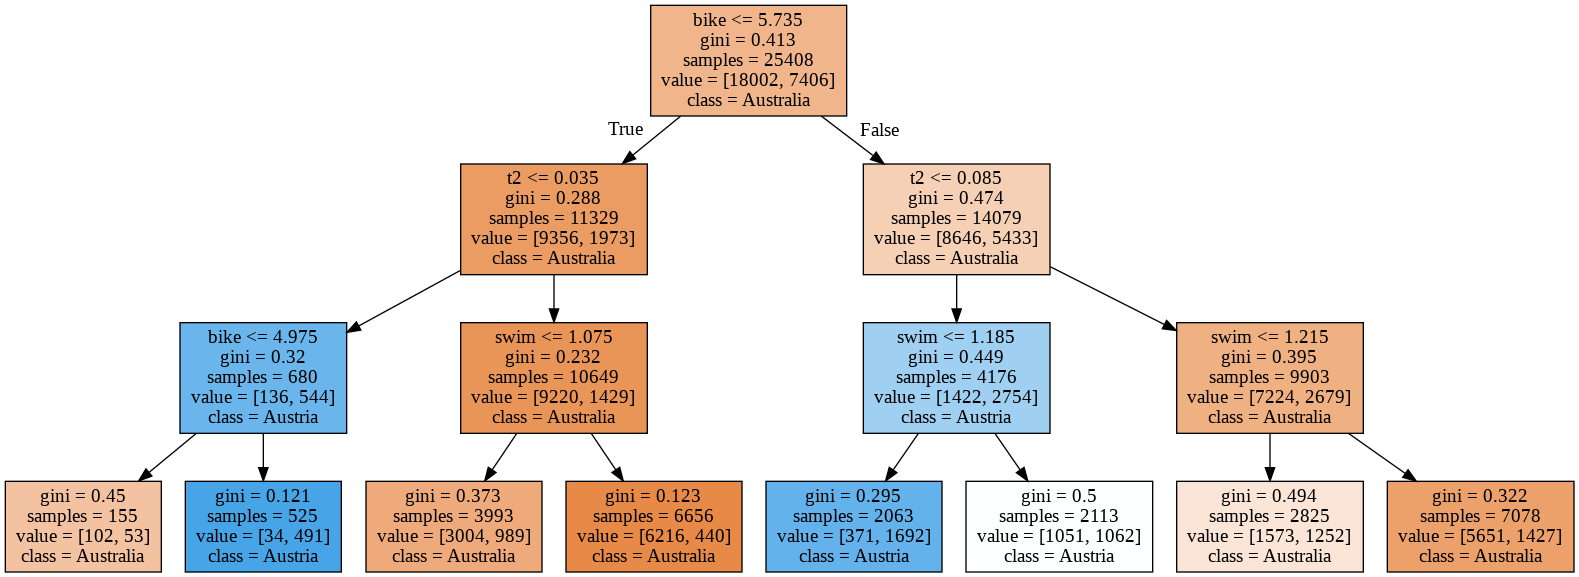

In [0]:
Image(g.create_png())

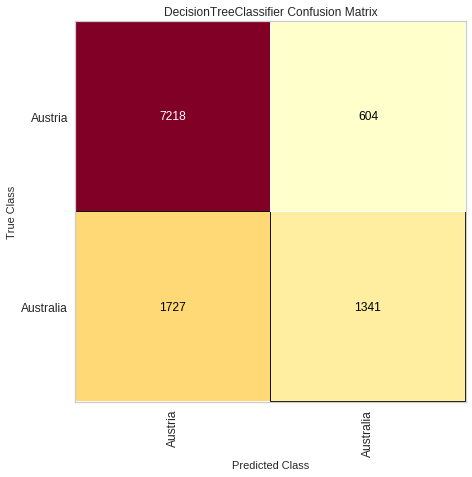

In [0]:
mapping = {0:'Austria', 1:"Australia"}
fig, ax = plt.subplots(figsize=(7,7))
cm_viz = ConfusionMatrix(dt, classes=['Austria', "Australia"],
                        label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof();

### Random Forest ###

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(random_state = 123, n_jobs=-1, n_estimators = 100, max_depth=5)

In [0]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [0]:
rf.score(X_test, y_test)

0.8366391184573003

In [0]:
for col, val in sorted(zip(X.columns, rf.feature_importances_),
                      key = lambda x: x[1],
                      reverse = True)[:5]:
    print(f"{col:10}{val:10.3f}")

bike           0.328
t2             0.284
swim           0.167
t1             0.103
overall        0.088


In [0]:
df_AU = df2.loc[ df2['Australia']== 1 ]
df_AT = df2.loc[ df2['Australia']== 0 ]

print('Average Australian swim time: ' + str( convert_time(avg(df_AU, 'swim'))) )
print('Average Australian swim time: ' + str( convert_time(avg(df_AU, 'bike'))) )

print('Average Austrian swim time: ' + str( convert_time(avg(df_AT, 'swim'))) )
print('Average Austrian swim time: ' + str( convert_time(avg(df_AT, 'bike'))) )

Average Australian swim time: 1:09
Average Australian swim time: 6:15
Average Austrian swim time: 1:15
Average Austrian swim time: 5:50


In [0]:
from yellowbrick.model_selection import ValidationCurve

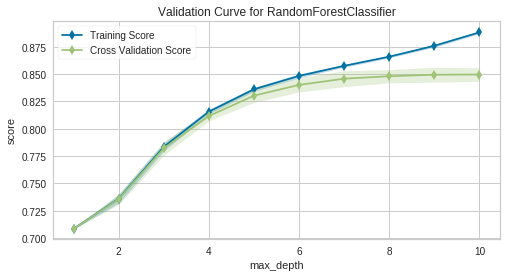

In [0]:
plt.figure(figsize=(8,4))
vc_viz = ValidationCurve(RandomForestClassifier(n_estimators=100),
                        param_name="max_depth",
                        param_range=np.arange(1,11),
                        cv=10,
                        n_jobs=-1)

vc_viz.fit(X_train,y_train)
vc_viz.poof();

### XGBoost ###

In [0]:
import xgboost as xgb

In [0]:
xgb_class = xgb.XGBClassifier(random_state=123)

In [0]:
xgb_class.fit(X_train, y_train,
             early_stopping_rounds=10,
             eval_set=[ (X_test, y_test ) ])

[0]	validation_0-error:0.21405
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.188613
[2]	validation_0-error:0.191093
[3]	validation_0-error:0.184298
[4]	validation_0-error:0.183655
[5]	validation_0-error:0.183838
[6]	validation_0-error:0.18494
[7]	validation_0-error:0.182094
[8]	validation_0-error:0.176309
[9]	validation_0-error:0.174472
[10]	validation_0-error:0.173462
[11]	validation_0-error:0.170707
[12]	validation_0-error:0.170248
[13]	validation_0-error:0.168687
[14]	validation_0-error:0.166942
[15]	validation_0-error:0.166667
[16]	validation_0-error:0.16281
[17]	validation_0-error:0.161065
[18]	validation_0-error:0.160422
[19]	validation_0-error:0.158953
[20]	validation_0-error:0.157392
[21]	validation_0-error:0.158219
[22]	validation_0-error:0.155923
[23]	validation_0-error:0.156382
[24]	validation_0-error:0.154178
[25]	validation_0-error:0.153994
[26]	validation_0-error:0.153994
[27]	validation_0-error:0.154178
[28]	validation_0-error

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_class.score(X_test, y_test)

0.8532598714416896

In [0]:
for col, val in sorted(zip(X.columns, xgb_class.feature_importances_),
                      key = lambda x: x[1],
                      reverse = True)[:5]:
    print(f"{col:10}{val:10.3f}")

t2             0.343
bike           0.227
t1             0.197
swim           0.174
run            0.036


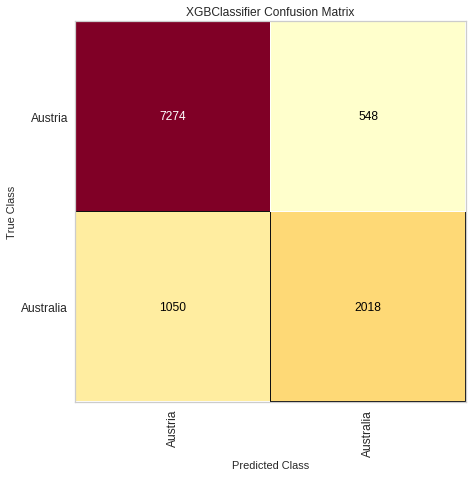

In [0]:
mapping = {0:'Austria', 1:"Australia"}
fig, ax = plt.subplots(figsize=(7,7))
cm_viz = ConfusionMatrix(xgb_class, classes=['Austria', "Australia"],
                        label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof();

### Regression with Coeur d'Alene Location sns regplot ###

Bike and run observations of Coeur dAlene

### Cleaning ###

In [0]:
#DROPPING ROWS FOR REG PROBLEM
#cleaning the dirty

df_coeur_dalene = df_coeur_dalene.replace('---', np.nan)

df_coeur_dalene = df_coeur_dalene.dropna()

df_coeur_dalene.reset_index(drop=True)

print('')

In [0]:
print( df_coeur_dalene.columns.tolist() )
print( df_coeur_dalene.shape )

['swim', 't1', 'bike', 't2', 'run', 'overall', 'location']
(4310, 7)


In [0]:
def float_timedelt2( arg ):
    return pd.to_timedelta(df_coeur_dalene[arg].values).total_seconds() / 3600

In [0]:
#converting object dtype to float
df_coeur_dalene['swim'] = float_timedelt2('swim')
df_coeur_dalene['bike'] = float_timedelt2('bike')
df_coeur_dalene['run'] = float_timedelt2('run')
df_coeur_dalene['overall'] = float_timedelt2('overall')

In [0]:
print( df_coeur_dalene.dtypes )

swim        float64
t1           object
bike        float64
t2           object
run         float64
overall     float64
location     object
dtype: object


### Plotting

In [0]:
import seaborn as sns

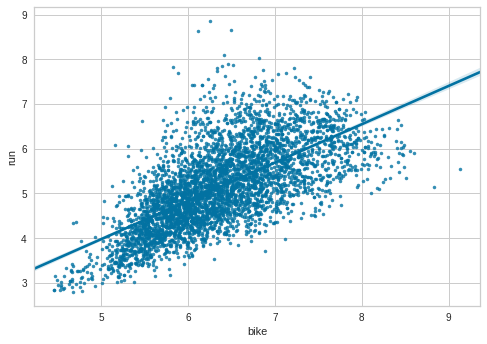

In [0]:
sns.regplot(df_coeur_dalene['bike'],
            df_coeur_dalene['run'],
            fit_reg=True,
            marker='.')

### LassoRegression ###

In [0]:
from sklearn.linear_model import LassoLarsCV

In [0]:
model = LassoLarsCV( cv=10, max_n_alphas=10 )

In [0]:
model.fit( X_train, y_train )

LassoLarsCV(copy_X=True, cv=10, eps=2.220446049250313e-16, fit_intercept=True,
            max_iter=500, max_n_alphas=10, n_jobs=None, normalize=True,
            positive=False, precompute='auto', verbose=False)

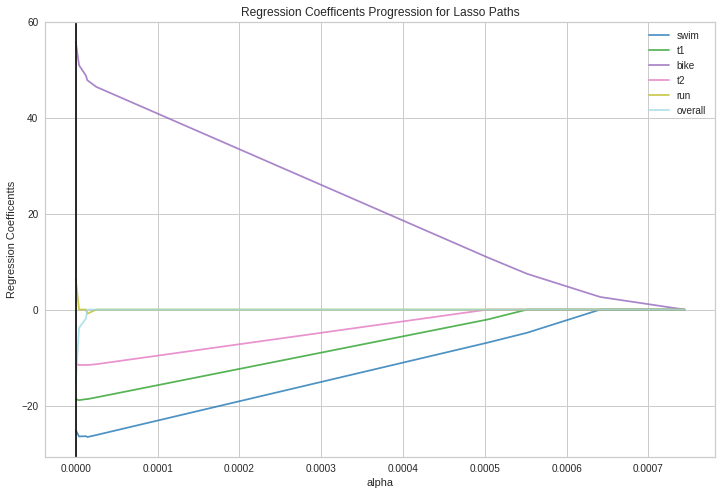

In [0]:
fig, ax = plt.subplots( figsize= (12,8) )
cm = iter( plt.get_cmap("tab20")(np.linspace(0,1,X.shape[1])) )
for i in range(X.shape[1] ):
  c = next( cm )
  ax.plot(model.alphas_, model.coef_path_.T[:,i], c=c, alpha=0.8, label=X.columns[i])
  
ax.axvline(model.alpha_, linestyle="-",c="k",label="alphaCV")
plt.ylabel("Regression Coefficentts")
ax.legend(X.columns, bbox_to_anchor=(1,1))
plt.xlabel("alpha")
plt.title("Regression Coefficents Progression for Lasso Paths");


### Future ideas ###


Classifying location where most people are likely to "DNF".
Problem has lots of factors, which events did they not finish and should a value be imputed for that value?

### Regression###

DummyRegressor()
BaselineModel

LinearRegression()
SimpleModel

SVR()

KNR()

RFR()

Homoscedasticity vs Heteroscedasticity

Regression models tested around .99

pd.DataFrame({"Feature":X,train.columns,"coef":lr.coef_})